# Taller: Análisis de Tendencias para Google y Microsoft

En este taller analizaremos los datos de precios para Google y Microsoft (símbolos `GOOGL` y `MSFT`) utilizando la base `prices.csv`.

El objetivo es:

- Filtrar los datos para estas dos empresas.
- Convertir la columna de fecha de forma robusta, ya que diferentes empresas pueden tener distintos formatos de fecha.
- Ordenar los datos por fecha.
- Aplicar un suavizado (media móvil) para ver la tendencia general durante el periodo (máximo 2016).
- Generar una gráfica final que integre un storytelling (Setup, Conflict y Resolution) en el análisis de la tendencia.

Responde las siguientes preguntas en el proceso:

1. ¿Cuáles son el primer y último año del dataset para las empresas seleccionadas?
2. ¿Cuántas observaciones tienes para cada empresa?
3. ¿Qué tendencia se observa tras aplicar el suavizado?


In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
!unzip time_series.zip
!cp -r time_series/* ./

--2025-04-03 21:48:56--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip [following]
--2025-04-03 21:48:57--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15602616 (15M) [application/zip]
Saving to: ‘time_series.zip.1’

time_series.zip.1   100%[===================>]  14.88M  30.5MB/s    in 0.5s    

2025-04-03 21:48:58 (30.5 MB/s) - ‘

## Paso 1: Carga del Dataset y Filtrado de Empresas

Carga el archivo `prices.csv` y filtra únicamente los datos correspondientes a Google y Microsoft.

Pregunta: ¿Qué cantidad de observaciones tienes para cada empresa después del filtrado?

In [ ]:
import pandas as pd
data = pd.read_csv('prices.csv')
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
filtro = data[(data['symbol'] == 'GOOGL') | (data['symbol'] == 'MSFT')]

In [ ]:
filtro.head()

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
544,2010-01-04,MSFT,30.620001,30.950001,30.590000,31.100000,38409100.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1012,2010-01-05,MSFT,30.850000,30.959999,30.639999,31.100000,49749600.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0


## Paso 2: Conversión Robust a Formato Datetime

Dado que diferentes empresas podrían tener formatos de fecha distintos, convertiremos la columna `date` usando `pd.to_datetime` sin forzar un formato fijo.

Elimina las filas que no se puedan convertir (donde la fecha es `NaT`).

Pregunta: ¿Cuántas filas se descartan por tener fechas inválidas?

In [ ]:
filtro['date'] = pd.to_datetime(filtro['date'], format='%Y-%m-%d')
filtro.head()

<ipython-input-69-defe91926e38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['date'] = pd.to_datetime(filtro['date'], format='%Y-%m-%d')


,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
544,2010-01-04,MSFT,30.620001,30.950001,30.590000,31.100000,38409100.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1012,2010-01-05,MSFT,30.850000,30.959999,30.639999,31.100000,49749600.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0


## Paso 3: Ordenar Datos y Análisis Inicial

Ordena los datos por la columna `date` para cada empresa y determina:

- ¿Cuál es el primer año y el último año para cada empresa?
- ¿Cuántas observaciones hay en total para el periodo (recordando que la fecha máxima es 2016)?

In [ ]:
data_ordenada = filtro.sort_values(by='date')
data_ordenada.head()

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
544,2010-01-04,MSFT,30.620001,30.950001,30.590000,31.100000,38409100.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1012,2010-01-05,MSFT,30.850000,30.959999,30.639999,31.100000,49749600.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0


## Paso 4: Visualización Inicial (Setup) – Gráfica de Precios de Cierre

Construye una gráfica inicial que muestre el precio de cierre a lo largo del tiempo para Google y Microsoft.

Utiliza un título multi-línea que comunique la etapa Setup. Por ejemplo:

```
Setup: Serie de Precios sin Suavizado
Datos originales para Google y Microsoft
CONFLICT: IDENTIFICAR MOVIMIENTOS ATÍPICOS
```

Pregunta: ¿Qué diferencias notas entre las series de ambas empresas?

In [ ]:
filtro_pivot = pd.pivot_table(data_ordenada, values='close', index='date', columns='symbol')


In [ ]:
filtro_pivot

symbol,GOOGL,MSFT
date,,
2010-01-04,626.750011,30.950001
2010-01-05,623.990017,30.959999
2010-01-06,608.260035,30.770000
2010-01-07,594.100015,30.450001
2010-01-08,602.020005,30.660000
...,...,...
2016-12-23,807.799988,63.240002
2016-12-27,809.929993,63.279999
2016-12-28,804.570007,62.990002


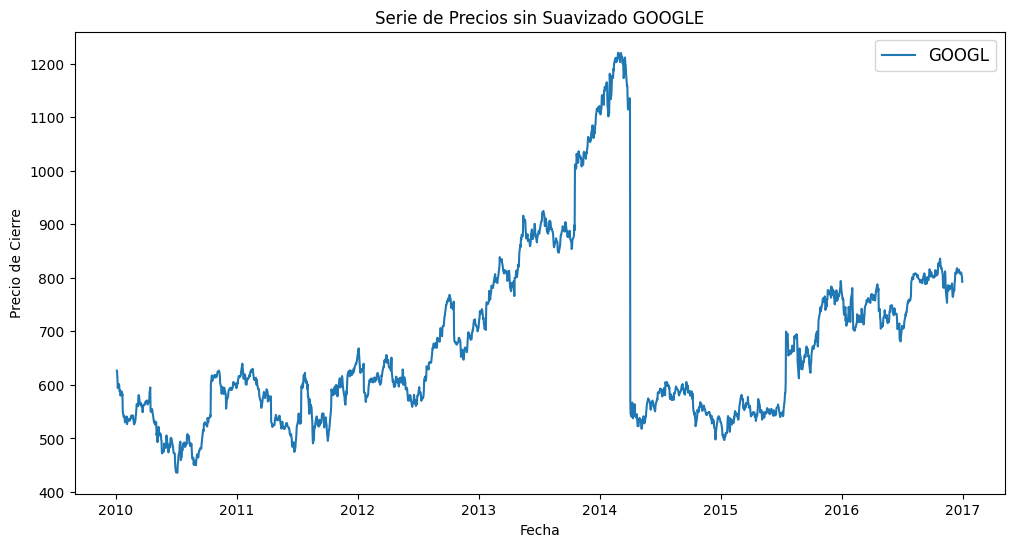

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(filtro_pivot['GOOGL'], label='GOOGL')
plt.title('Serie de Precios sin Suavizado GOOGLE')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(fontsize=12)
plt.show()

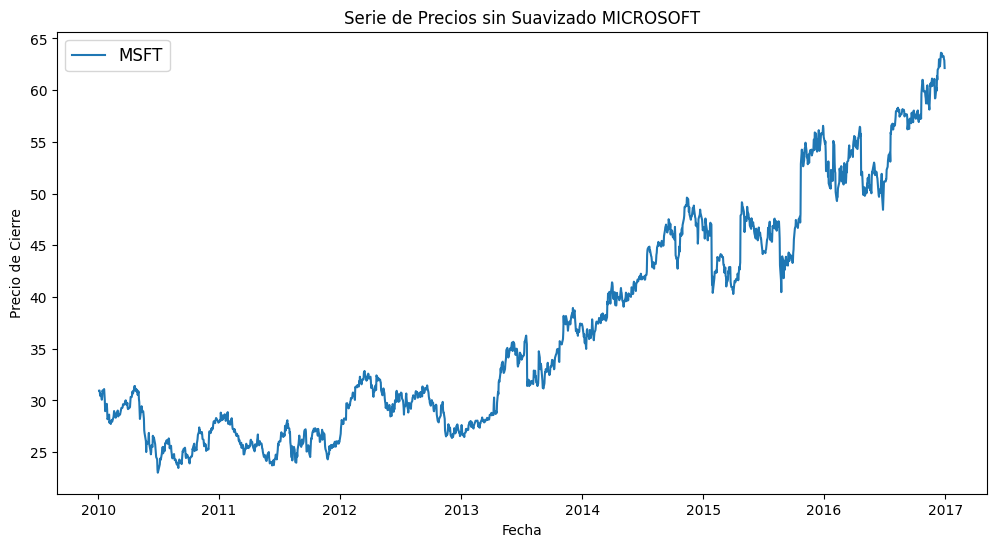

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(filtro_pivot['MSFT'], label='MSFT')
plt.title('Serie de Precios sin Suavizado MICROSOFT')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(fontsize=12)
plt.show()

## Paso 5: Aplicar Suavizado (Resolution) – Media Móvil y Análisis de Tendencia

Aplica un suavizado a las series (por ejemplo, una media móvil) para resaltar la tendencia general en los datos.

Pregunta: ¿Qué ventana de suavizado (en días) consideras adecuada para observar la tendencia en el año 2016? ¿Cómo se comporta la tendencia para Google y Microsoft después de suavizar los datos?

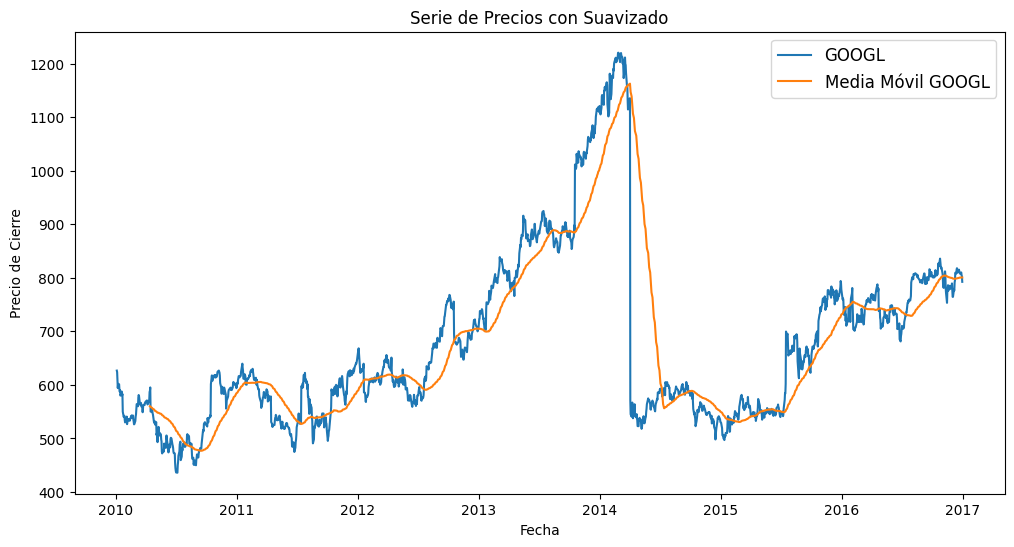

In [ ]:
ventana_suavizado = 70
media_movil = filtro_pivot.rolling(window=ventana_suavizado).mean()
plt.figure(figsize=(12, 6))
plt.plot(filtro_pivot['GOOGL'], label='GOOGL')
plt.plot(media_movil['GOOGL'], label='Media Móvil GOOGL')
plt.title('Serie de Precios con Suavizado')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(fontsize=12)
plt.show()

NameError: name 'df' is not defined

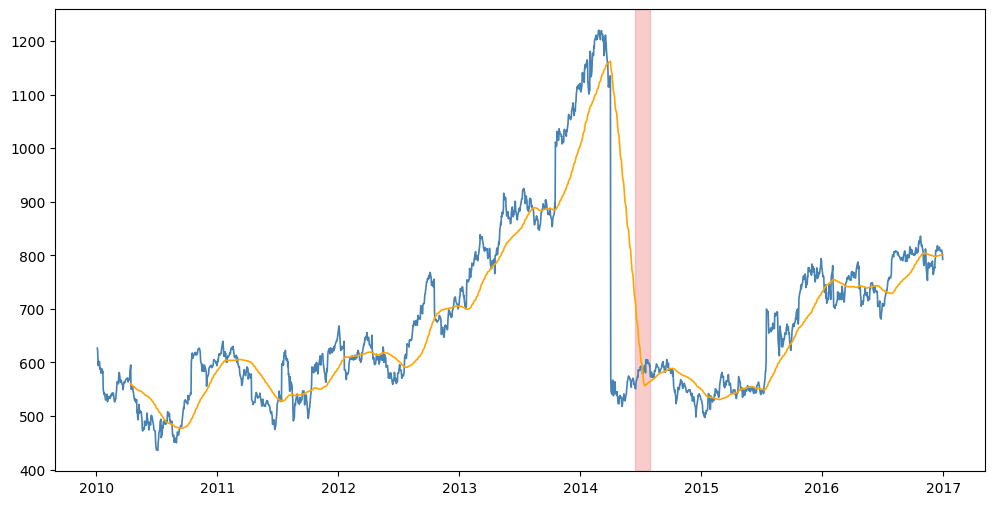

In [ ]:
inicio_anomalia = '2014-06-15'
fin_anomalia = '2014-07-31'
df_anomalia = filtro_pivot.loc[inicio_anomalia:fin_anomalia]

media_anomalia = df_anomalia["GOOGL"].mean()

plt.figure(figsize=(12, 6))
plt.plot(filtro_pivot['GOOGL'], label='GOOGL', color= "steelblue", linewidth=1.2)
plt.plot(media_movil['GOOGL'], label='Media Móvil GOOGL', color= "orange", linewidth=1.2)
# Changed 'axvpan' to 'axvspan' to call the correct function for adding a vertical span.
plt.axvspan(pd.to_datetime(inicio_anomalia), pd.to_datetime(fin_anomalia), color='lightcoral', alpha=0.4, label='Periodo conflictivo')
plt.annotate("anomalia detectada",
             xy=(pd.to_datetime('2014-07-30'), df.loc['2015-01-01', 'Valor']),
             xytext=(pd.to_datetime('2014-08-01'), df.loc['2015-01-02', 'Valor'] + 10),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12,
             color='darkred')

plt.title('Conflict: Identificación de Anomalías en la Serie', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.legend(fontsize=12)
plt.show()

print(f"Media en el periodo conflictivo: {media_anomalia:.2f}")

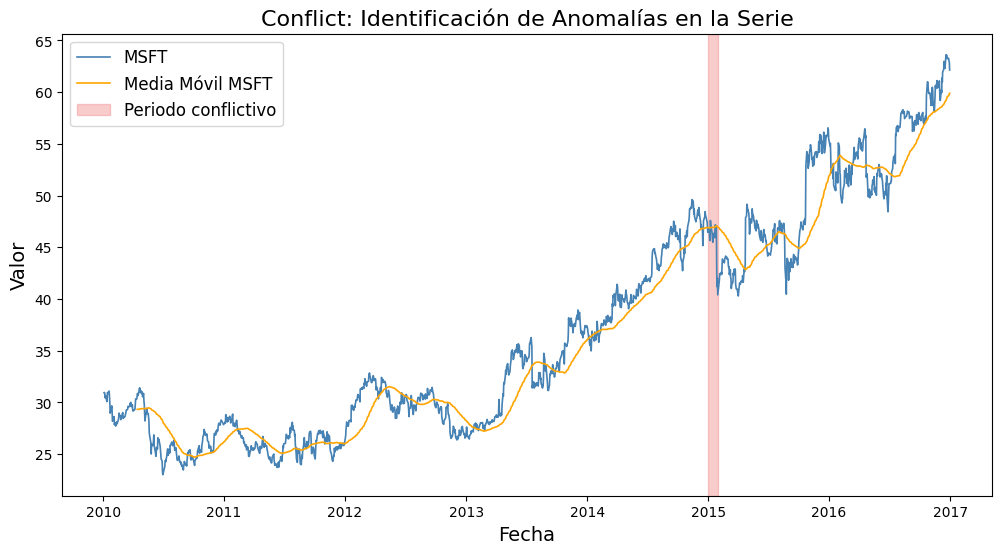

In [ ]:
inicio_anomalia = '2015-01-01'
fin_anomalia = '2015-01-31'
df_anomalia = filtro_pivot.loc[inicio_anomalia:fin_anomalia]

media_anomalia = df_anomalia["MSFT"].mean()

plt.figure(figsize=(12, 6))
plt.plot(filtro_pivot['MSFT'], label='MSFT', color= "steelblue", linewidth=1.2)
plt.plot(media_movil['MSFT'], label='Media Móvil MSFT', color= "orange", linewidth=1.2)
# Changed 'axvpan' to 'axvspan' to call the correct function for adding a vertical span.
plt.axvspan(pd.to_datetime(inicio_anomalia), pd.to_datetime(fin_anomalia), color='lightcoral', alpha=0.4, label='Periodo conflictivo')


plt.title('Conflict: Identificación de Anomalías en la Serie', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.legend(fontsize=12)
plt.show()

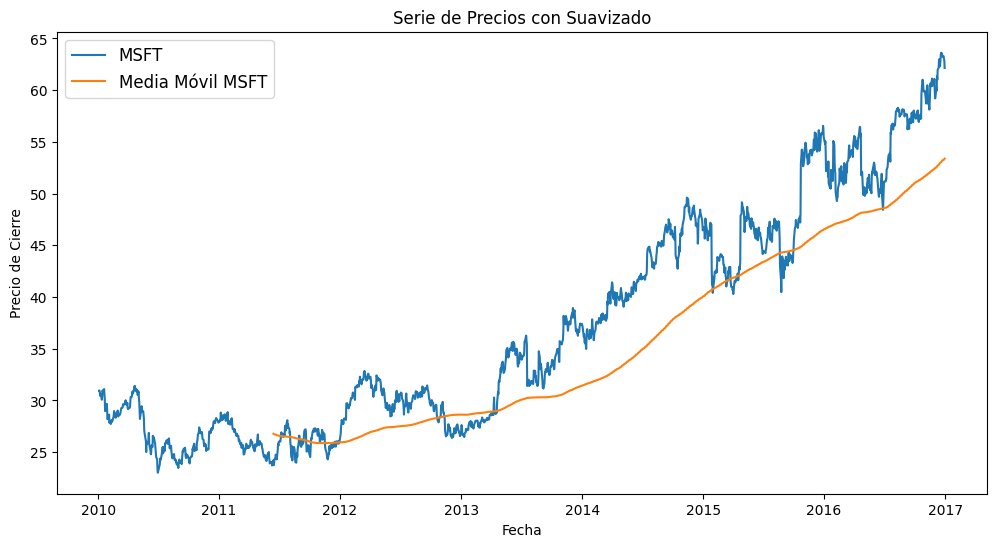

In [ ]:
ventana_suavizado = 365
media_movil = filtro_pivot.rolling(window=ventana_suavizado).mean()
plt.figure(figsize=(12, 6))
plt.plot(filtro_pivot['MSFT'], label='MSFT')
plt.plot(media_movil['MSFT'], label='Media Móvil MSFT')
plt.title('Serie de Precios con Suavizado')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(fontsize=12)
plt.show()

## Conclusiones y Entrega

En este taller se ha realizado lo siguiente:

- Se cargaron los datos y se filtraron únicamente para las empresas Google y Microsoft.
- Se convirtió la columna `date` de forma robusta, eliminando filas con fechas inválidas.
- Se ordenaron los datos cronológicamente y se obtuvieron información general (primer y último año, número de observaciones por empresa).
- Se construyó una gráfica de storytelling con dos etapas:
  - **Setup:** Visualización inicial de los precios de cierre originales para Google y Microsoft.
  - **Resolution:** Aplicación de un suavizado (media móvil) para resaltar la tendencia general.

Tu entrega final debe incluir las gráficas generadas y una breve explicación de cada paso, respondiendo las preguntas planteadas en el taller.